In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
df= pd.read_csv(r"C:\Users\HP\Desktop\AI_Data_science\Data_sci\Assignmets\Multi linear reg\50_Startups.csv")

In [3]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
#check null values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

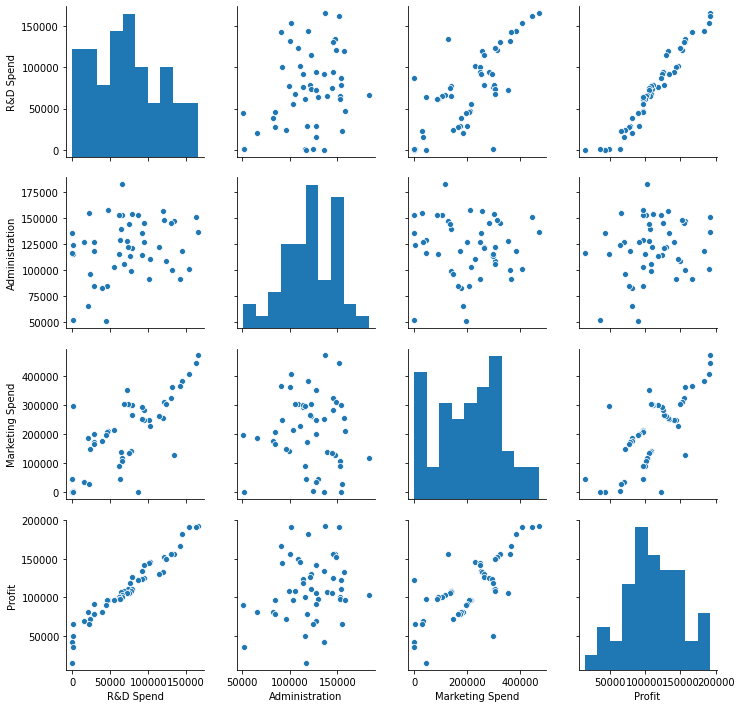

In [6]:
#pairplot
sns.pairplot(df)

In [7]:
#find correlations
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [8]:
df = df.drop('Administration',axis=1)

In [9]:
#dummy for stats
dummy = pd.get_dummies(df.State)

In [10]:
dummy

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [11]:
X = df.iloc[:,:2]
Y = df.iloc[:,3]

In [12]:
X = pd.concat([X, dummy],axis=1)


In [13]:
df = pd.concat([df, dummy],axis=1)

In [25]:
df.head()
x1 = df['R&D Spend']
x2 = df['Marketing Spend']
x3 = df['California']
x4 = df['Florida']
x5 = df['New York']
y = df['Profit']

In [26]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols(formula='y~x1+x2+x3+x4+x5',data=df).fit()


In [27]:
model.params

Intercept    35249.524615
x1               0.796743
x2               0.029751
x3           11709.420368
x4           11850.207314
x5           11689.896933
dtype: float64

In [28]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    16.782480
x1           18.771167
x2            1.842164
x3            6.129585
x4            5.458654
x5            5.878963
dtype: float64 
 Intercept    5.420201e-21
x1           6.509785e-23
x2           7.204640e-02
x3           2.004515e-07
x4           1.970877e-06
x5           4.720949e-07
dtype: float64


In [29]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.950453304509085, 0.9460491537987815)

# Calculation of VIF (not needed here)

In [31]:

rsq_hp = smf.ols('x1~x2+x3+x4',data=df).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

In [32]:
vif_hp

2.122150706815202

In [33]:
rsq_hp = smf.ols('x2~x1+x3+x4',data=df).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

In [34]:
vif_hp

2.180587000444791

In [35]:
rsq_hp = smf.ols('x3~x1+x2+x4',data=df).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

In [36]:
vif_hp

1.3348252613955256

In [37]:
rsq_hp = smf.ols('x4~x1+x3+x2',data=df).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

In [38]:
vif_hp

1.3583487653884938

# ploting  Q-Q plot

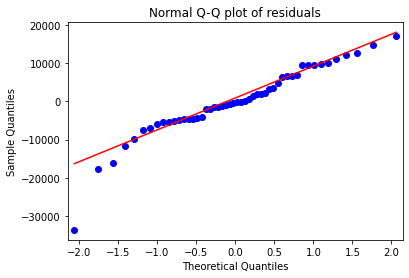

In [39]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# cooldistance plot

In [40]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

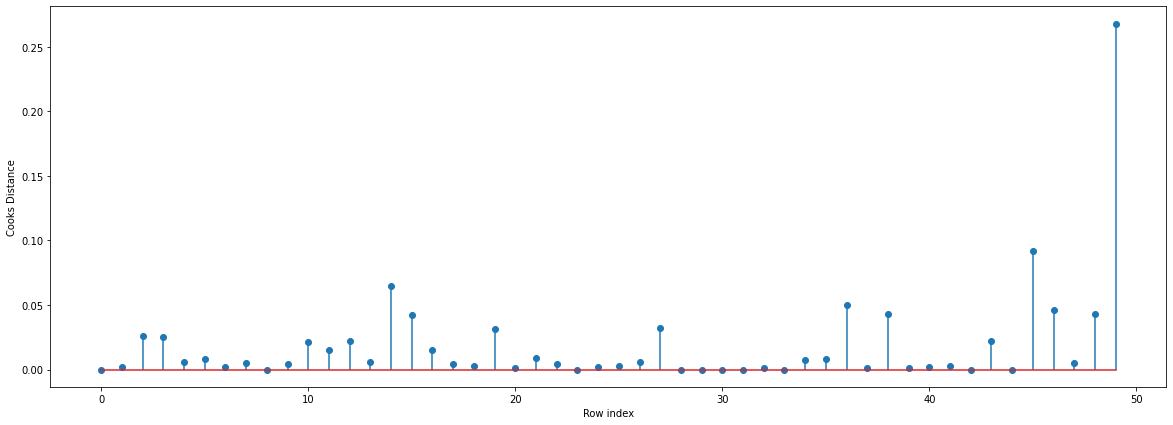

In [43]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [45]:
#index of the data points where c is more than 
(np.argmax(c),np.max(c))

(49, 0.26831865039824276)

In [66]:
###drop 49 index

In [51]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df_new=df.drop(df.index[49],axis=0).reset_index()

In [52]:
df_new

,index,R&D Spend,Marketing Spend,State,Profit,California,Florida,New York
0,0,165349.20,471784.10,New York,192261.83,0,0,1
1,1,162597.70,443898.53,California,191792.06,1,0,0
2,2,153441.51,407934.54,Florida,191050.39,0,1,0
3,3,144372.41,383199.62,New York,182901.99,0,0,1
4,4,142107.34,366168.42,Florida,166187.94,0,1,0
5,5,131876.90,362861.36,New York,156991.12,0,0,1
6,6,134615.46,127716.82,California,156122.51,1,0,0
7,7,130298.13,323876.68,Florida,155752.60,0,1,0
8,8,120542.52,311613.29,New York,152211.77,0,0,1
9,9,123334.88,304981.62,California,149759.96,1,0,0


In [55]:
df_new.head()
x1 = df_new['R&D Spend']
x2 = df_new['Marketing Spend']
x3 = df_new['California']
x4 = df_new['Florida']
x5 = df_new['New York']
y = df_new['Profit']

# Build new model

In [57]:
model_new = smf.ols(formula='y~x1+x2+x3+x4+x5',data=df_new).fit()

In [59]:
model_new.rsquared, model_new.rsquared_adj

(0.9615819564241955, 0.9580894070082133)

In [60]:
model_influence = model_new.get_influence()
(c, _) = model_influence.cooks_distance

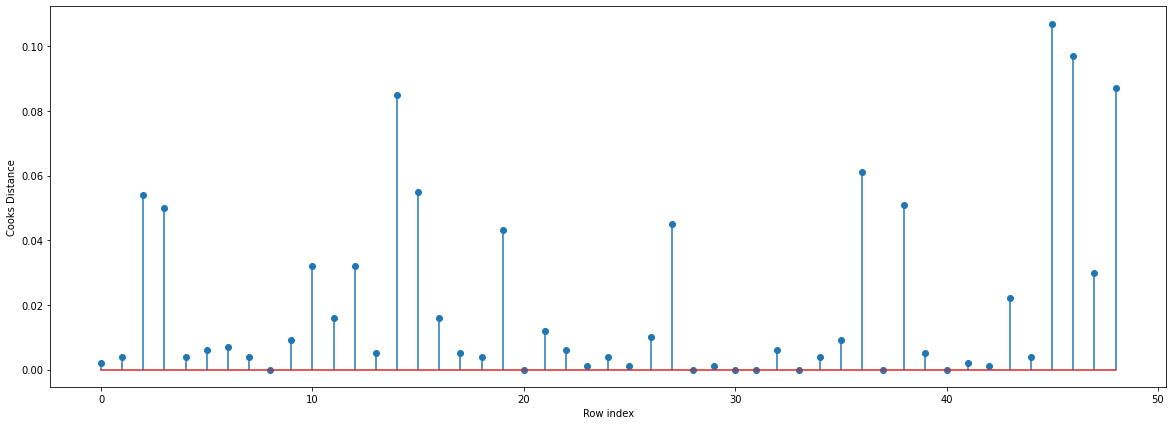

In [61]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df_new)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [62]:
#New data for prediction
new_data=pd.DataFrame({'x1':165349.2,"x2":471784.10,"x3":0,"x4":0,"x5":0},index=[1])

In [63]:
new_data

,x1,x2,x3,x4,x5
1,165349.2,471784.1,0,0,0


In [64]:
model_new.predict(new_data)

1    178766.965952
dtype: float64